In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import subprocess

import sys
from copy import copy
import scipy
import imageio
sys.path.append("../")
import itertools
from scipy.stats import norm
import matplotlib.mlab as mlab
from mvgavg import mvgavg



from alienlab import utils
import alienlab
from alienlab import regression_func
import pickle as pk
from alienlab import plot
from activation_experiment import activation_experiment


import skimage.registration


from useful_func import dtw, get_path, plot_warped_timeseries
from useful_func import spectrum_a, spectrum_d
from useful_func import residuals, exp_decay, get_fit, sigmoid, exp_decay_max
from useful_func import gradient_magnitude, gradient_orientation, gaussian_kernel, assign_orientation, crop_center, cconv, get_algae_im
from numpy import genfromtxt

from joblib import Parallel, delayed
from useful_func import make_svm, make_pca

import sklearn
import sklearn.discriminant_analysis
import pandas as pd


import skimage

from useful_func import fit_biexp, fit_exp, fit_monoexp

import tifffile as tiff
import random
%matplotlib inline

g = plot.PlotFigure()
g.fontsize=17

https://ml-explained.com/blog/linear-discriminant-analysis-explained  
https://arxiv.org/pdf/1903.11240.pdf  
https://stats.stackexchange.com/questions/82497/can-the-scaling-values-in-a-linear-discriminant-analysis-lda-be-used-to-plot-e  


In [14]:

exp_set = []
exp_description = []
exp_position = []
exp_strain = []
photoinhibition_status = []
qE_status = []
qT_status = []

#ref_folder = 'Data_for_scanpy'
ref_folder = "../"
#0:stt71
#1:wt4
#2:npq4
#3:cc124
#4:WT222

if True:

    folder = ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(0)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(0)

if True:

    folder =  ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(0)
    
if True:

    folder =  ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI qE")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(0)

#################################    

if True:

    folder =  ref_folder + "/FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if True: 
    folder =  ref_folder +  "/FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qI qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if True:
    folder =  ref_folder + "/FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qI qE qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)



##################################

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(2)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qI qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(2)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qI qE qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(2)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)
    
    
#######################
if False:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if False: 
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qE qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)


######### slow activation qE


folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
exp_description.append("wt4-2H ENS not activated")
exp_set.append(activation_experiment(folder))
exp_position.append(1)
exp_strain.append(1)
photoinhibition_status.append(1)
qE_status.append(1)
qT_status.append(1)

#########################
"""

folder = "../FOLDER_2022_03_22_CC_124_activated_IBPC_sync"
exp_description.append("CC_124 activated IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)


folder = "../FOLDER_2022_03_23_npq4_activated_IBPC_sync"
exp_description.append("npq4 IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)


folder = "../FOLDER_2022_03_24_stt71_activated_IBPC_sync"
exp_description.append("stt71 IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)



folder = "../FOLDER_2022_03_25_wt4_activated_IBPC_sync"
exp_description.append("wt4 IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)


folder = "../FOLDER_2022_03_31_STT71_polyculture_slow_activateion_45min"
exp_description.append("stt7-45min ENS")
exp_set.append(activation_experiment(folder))
exp_position.append(0)


folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
exp_description.append("wt4-2H ENS not activated")
exp_set.append(activation_experiment(folder))
exp_position.append(0)


folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
exp_description.append("wt4-2H ENS activated")
exp_set.append(activation_experiment(folder))
exp_position.append(1)

folder = "../FOLDER_2022_04_05_WT4_monoclonal_synchro_ENS_4H"
exp_description.append("wt4-4H-monoclonal_synchro")
exp_set.append(activation_experiment(folder))

folder = "../FOLDER_2022_04_06_stt71_scl1_monoclonal_synchro_ENS_4H"
exp_description.append("stt7-4H-monoclonal_synchro")
exp_set.append(activation_experiment(folder))


folder = "../FOLDER_2022_04_07_stt71_scl3_monoclonal_synchro_ENS_4H"
exp_description.append("stt7-scl3-4H-monoclonal_synchro")
exp_set.append(activation_experiment(folder))




folder = "../FOLDER_2022_03_29_4H_ENS_CC_124_sync"
exp_description.append("CC_124_ENS_test1")
exp_set.append(activation_experiment(folder))




folder = "../FOLDER_2022_03_30_4H_ENS_CC_124_sync"
exp_description.append("CC_124_ENS_test2")
exp_set.append(activation_experiment(folder))

"""

'\n\nfolder = "../FOLDER_2022_03_22_CC_124_activated_IBPC_sync"\nexp_description.append("CC_124 activated IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\nfolder = "../FOLDER_2022_03_23_npq4_activated_IBPC_sync"\nexp_description.append("npq4 IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\nfolder = "../FOLDER_2022_03_24_stt71_activated_IBPC_sync"\nexp_description.append("stt71 IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\n\nfolder = "../FOLDER_2022_03_25_wt4_activated_IBPC_sync"\nexp_description.append("wt4 IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\nfolder = "../FOLDER_2022_03_31_STT71_polyculture_slow_activateion_45min"\nexp_description.append("stt7-45min ENS")\nexp_set.append(activation_experiment(folder))\nexp_position.append(0)\n\n\nfolder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"\nexp_description.append("wt4-2H ENS not activated")\nex

In [15]:
def get_traces_from_couples(list_of_couples, traces):
    v0 = np.expand_dims(traces[:,250], 1)
    traces_0 = (v0 - traces[:,list_of_couples[0]])/traces[:,list_of_couples[0]]
    traces_1 = (v0 - traces[:,list_of_couples[1]])/traces[:,list_of_couples[1]]
    traces = traces_1 - traces_0
    return traces
    

In [65]:
if True:
    liste_pair = list(itertools.combinations(np.linspace(250, 2050, 91).astype(int), 2))
    #liste_pair = list(itertools.combinations(np.linspace(250, 250 + 10*20, 11).astype(int), 2))

    list_of_couples = list(zip(*liste_pair))
    traces_qE = []
    trace_set = []
    class_set = []
    strain_set  = []
    description_set = []
    couple_set = []
    

    for j, elem in enumerate(exp_set):
        if exp_position[j] == 0:
            traces, labels = elem.get_traces(elem.measure[0][-2:])

        if exp_position[j] == 2:
            traces, labels = elem.get_traces(elem.measure[0][0:1])

        if exp_position[j] == 1:
            traces, labels = elem.get_traces(elem.measure[1][-2:])
        t_qE = traces[:,250::20].T
        t_qE = (t_qE[0]- t_qE)/t_qE
        traces_qE.append(t_qE.T)
        traces = get_traces_from_couples(list_of_couples, traces)
        trace_set.append(traces)
        class_set.append([j]*len(traces))
        strain_set.append([exp_strain[j]]*len(traces))
        description_set.append([exp_description[j]]*len(traces))
        diff  = np.array(len(list_of_couples[0])*["-"])
        A = np.array(list_of_couples[1]).astype(str)
        B = np.array(list_of_couples[0]).astype(str)   
        A = np.char.add(A, diff)
        couple_set=np.char.add(A, B)
   

In [66]:
all_data = np.concatenate(traces_qE)


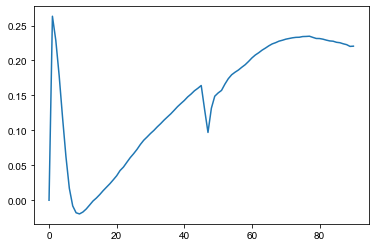

In [67]:
M = np.mean(all_data, axis = 0)
plt.plot(M)

In [68]:
#from https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python#mcetoc_1g0c4fnd49


all_descriptions = np.concatenate(description_set)
#all_descriptions = np.expand_dims(all_description)
#data = np.concatenate([all_data, all_strains, all_classes], axis = 1)

all_classes = np.concatenate(class_set)
#all_classes = np.expand_dims(all_classes, 1)


drops = []
for description in np.unique(all_descriptions):
    cor_matrix = np.abs(np.corrcoef(all_data[all_descriptions==description].T))
    
    #plt.matshow(cor_matrix)
    upper_tri = np.triu(np.ones(cor_matrix.shape),k=1).astype(np.float64)

    cor_tri = cor_matrix*upper_tri
    #plt.matshow(cor_tri)
    maxi_col = np.max(cor_tri, axis = 0)
    local_drop = maxi_col > 1
    drops.append(local_drop)
    print(description, np.sum(local_drop))

drops = np.array(drops)
drops.shape
positions_to_keep = np.sum(drops, axis = 0)<np.max(all_classes)
print("kept couples:", np.sum(positions_to_keep), ",", np.sum(positions_to_keep)/cor_matrix.shape[0]*100, "%")

stt7 0
stt7 qI 0
stt7 qI qE 0
wt4 qI qE qT 0
wt4 qI qT 0
wt4 qT 0
wt4-2H ENS not activated 0
kept couples: 91 , 100.0 %


C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


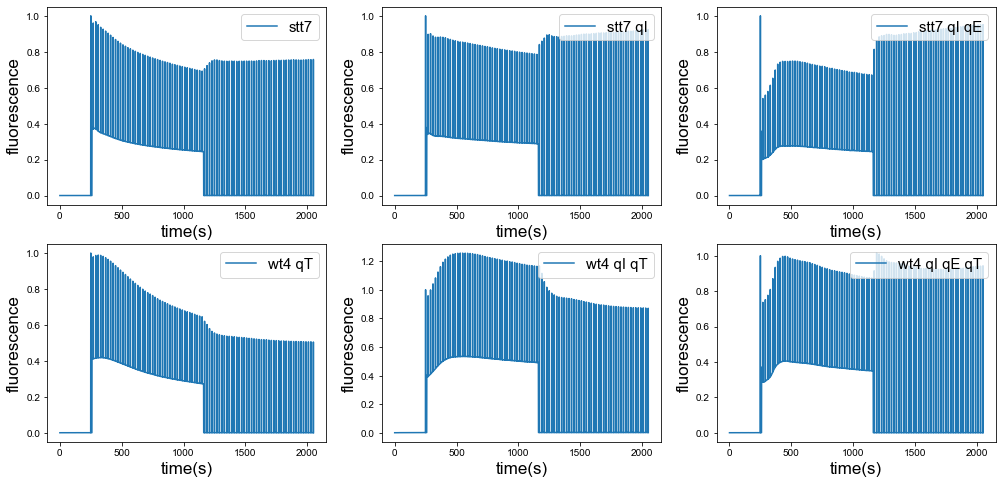

In [69]:
fig, axs = plt.subplots(2,3,figsize=(17,8))
axs = axs.flatten()
d = [0, 0, 1, 0, 0, 1]
dd = [0, -1, -1, 0, -1, -1]
for j, i in enumerate([0, 1, 2, 3, 4, 5]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    axs[j].plot(m/m[250], label = exp_description[i])
    axs[j].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[j].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[j].legend(prop={"size":15}, loc=1)
    
plt.savefig("4_types_mean_traces.pdf")

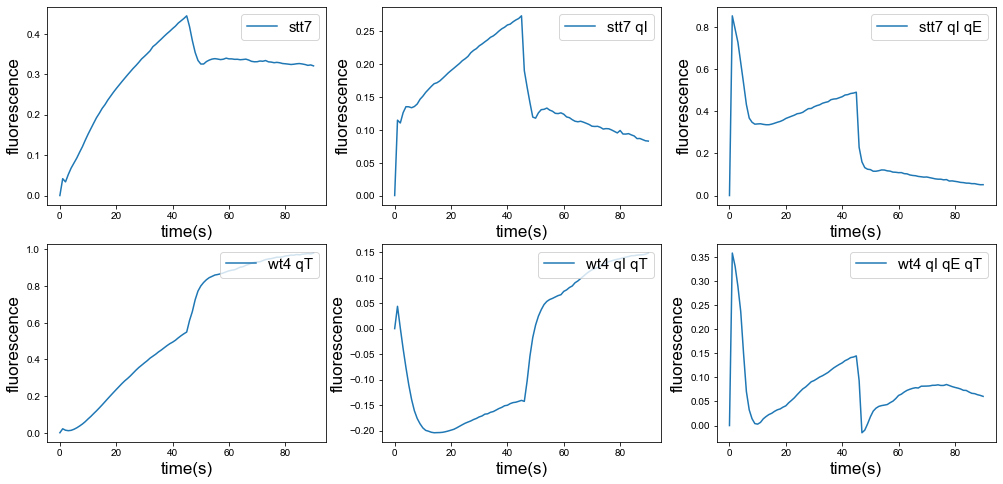

In [70]:
fig, axs = plt.subplots(2,3,figsize=(17,8))
axs = axs.flatten()
d = [0, 0, 1, 0, 0, 1]
dd = [0, -1, -1, 0, -1, -1]
for j, i in enumerate([0, 1, 2, 3, 4, 5]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    m = m[250::20]
    axs[j].plot((m[0]-m)/m, label = exp_description[i])
    axs[j].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[j].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[j].legend(prop={"size":15}, loc=1)
plt.savefig("4_types_mean_traces.pdf")

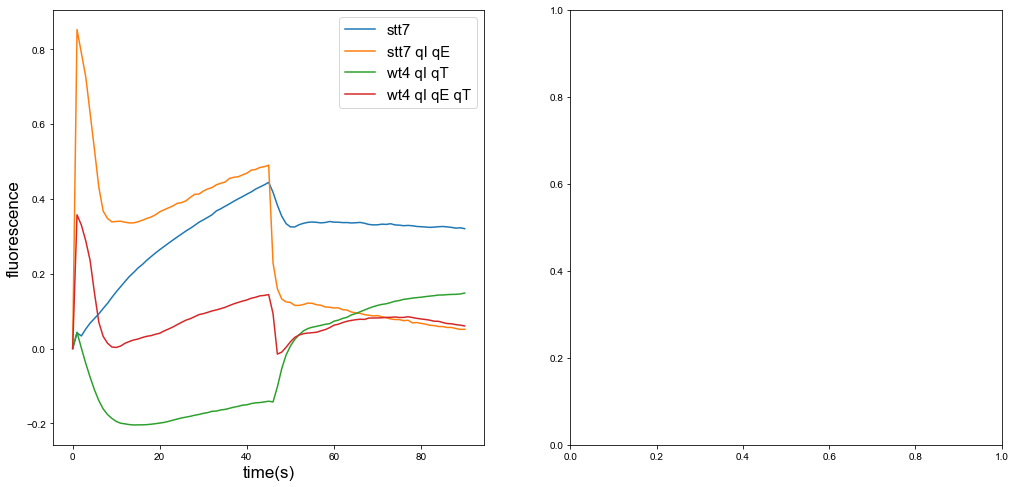

In [71]:
fig, axs = plt.subplots(1, 2,figsize=(17,8))
axs = axs.flatten()
d = [0, 1, 0, 1]
dd = [0, -1, -1, -1]
for j, i in enumerate([0, 2, 4, 5]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    m = m[250::20]
    axs[0].plot((m[0]-m)/m, label = exp_description[i])
    axs[0].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[0].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[0].legend(prop={"size":15}, loc=1)
    
plt.savefig("4_types_mean_traces.pdf")

In [72]:
def make_lda(n_components, train_data, Y_train_label):
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components = 3)
    M = train_data.mean(axis = 0)
    #S = train_data.std(axis = 0)
    S = 1
    print(M)
    print(S)
    train_data = (train_data - M)/S
    lda.fit(train_data,Y_train_label)
    X = lda.transform(train_data)
    print(X.shape)
    print("LDA components:")
    #lt.matshow(lda.scalings_)
    plt.figure()
    print("LDA explained variance:")
    plt.semilogy(lda.explained_variance_ratio_)
    plt.ylabel("eignevalue")
    plt.xlabel("component")

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:,2], c=Y_train_label)##
    #plt.plot(boundary[:,0], boundary[:,1], c = 'k')
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    return lda, M, S

def select_couples(positions_to_keep, arr):
    pos = np.where(arr.shape == np.array([len(positions_to_keep)]*len(arr.shape)))[0]
    if pos == 0: 
        arr = arr[positions_to_keep]
    elif pos == 1:
        arr = arr[:, positions_to_keep]
    elif pos == 2:
        arr = arr[:,:, positions_to_keep]
    
    return arr


In [73]:
for i, exp in enumerate(exp_description):
    print(i, exp)

0 stt7
1 stt7 qI
2 stt7 qI qE
3 wt4 qT
4 wt4 qI qT
5 wt4 qI qE qT
6 wt4-2H ENS not activated


In [74]:
selected_classes = [0, 1, 2, 3, 4]

ref = np.ones(all_data.shape[0])* -1
c =  np.concatenate(class_set)
for ind in selected_classes:
    ref += c == ind
    

database = select_couples(positions_to_keep, all_data)

all_couples = couple_set

index = select_couples(positions_to_keep, all_couples)

all_classes = np.concatenate(class_set)
all_strains = np.concatenate(strain_set)
all_descriptions = np.concatenate(description_set)

indices2 = np.linspace(0, len(all_classes)-1, len(all_classes)).astype(int)

all_classes = np.expand_dims(all_classes, 0)
all_strains = np.expand_dims(all_strains, 0)
all_descriptions = np.expand_dims(all_descriptions, 0)

database2 = np.concatenate([database.T, all_strains, all_classes], axis = 0)

data = database2[:,ref==0]
indices = indices2[ref==0]

C:\Users\Alienor\AppData\Local\Temp\ipykernel_17856\2643800069.py:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if pos == 0:
C:\Users\Alienor\AppData\Local\Temp\ipykernel_17856\2643800069.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif pos == 1:
C:\Users\Alienor\AppData\Local\Temp\ipykernel_17856\2643800069.py:34: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif pos == 2:


train size : (487, 93)
validation size : (55, 93)
test size : (61, 93)
[0.         0.28180213 0.24414854 0.21340002 0.18035014 0.1532817
 0.12538681 0.1084742  0.10614913 0.10925152 0.11559055 0.12224086
 0.12727771 0.13456288 0.13880224 0.14640376 0.1540085  0.16295936
 0.16990768 0.17946062 0.18781056 0.19821775 0.20380634 0.21259848
 0.22051207 0.22766619 0.2356068  0.24572534 0.25554039 0.26090355
 0.2674893  0.27367807 0.28062351 0.28806872 0.29499466 0.30198873
 0.30816499 0.31531513 0.32383232 0.32971185 0.33549366 0.34281618
 0.34939601 0.35618584 0.36093256 0.36743593 0.29205809 0.28531951
 0.30066094 0.32207985 0.33710377 0.34483678 0.35404834 0.36217537
 0.36791389 0.36797489 0.36642365 0.3663596  0.36660927 0.36813164
 0.36930959 0.37167369 0.37187191 0.37561891 0.37564778 0.37798439
 0.38100896 0.38083831 0.38272813 0.38395736 0.38571587 0.38751008
 0.38901931 0.39168765 0.39221731 0.39484869 0.39707614 0.39782294
 0.39793395 0.39737438 0.39916379 0.39922077 0.39977994 0.4

C:\Users\Alienor\AppData\Local\Temp\ipykernel_17856\3950434885.py:31: RuntimeWarning: invalid value encountered in true_divide
  train_svm = (train_set - M_svm)/S_svm
C:\Users\Alienor\AppData\Local\Temp\ipykernel_17856\3950434885.py:32: RuntimeWarning: invalid value encountered in true_divide
  validation_svm = (validation_set - M_svm)/S_svm
C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fi

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

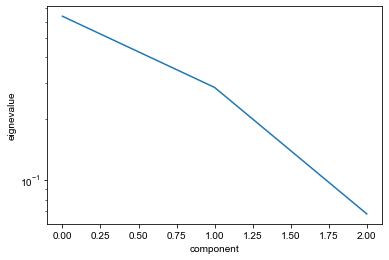

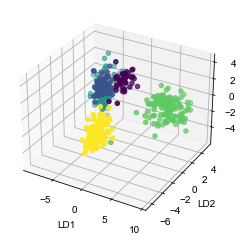

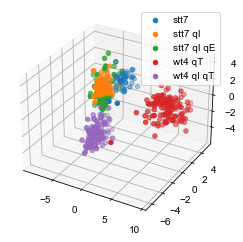

In [75]:
train, test, train_indices, test_indices = sklearn.model_selection.train_test_split(data.T, indices, test_size = 0.1)#, random_state = 1) #always generate the same test set
train, validation, train_indices, validation_indices = sklearn.model_selection.train_test_split(train, train_indices, test_size = 0.1)
print("train size :", train.shape)
print("validation size :", validation.shape)
print("test size :", test.shape)


train_set = train[:,:-2]
validation_set = validation[:,:-2]
train_classes =  train[:,-1]
validation_classes= validation[:,-1] 
labels = train[:,-2]
lda, M, S = make_lda(train.shape[1]-3, train_set, train_classes)
pk.dump(lda, open("pca.pkl","wb"))



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mean_pos = []
for label in np.unique(train_classes):
    ind = data.T[train_indices, -1] == label
    X = lda.transform((train_set[ind]- M)/S)
    description = all_descriptions[0,train_indices][ind][0]
    mean_pos.append(np.mean(X[:,:3], axis = 0))
    ax.scatter(X[:, 0], X[:, 1], X[:,2], label = description)##

plt.legend()
M_svm = np.mean(train_set, axis = 0)
S_svm = np.std(train_set, axis = 0)
train_svm = (train_set - M_svm)/S_svm
validation_svm = (validation_set - M_svm)/S_svm
final_model = make_svm(train_svm, train_classes)


pred = final_model.predict(validation_svm)
print("validation accuracy:", np.mean(pred==validation_classes))
plt.show()

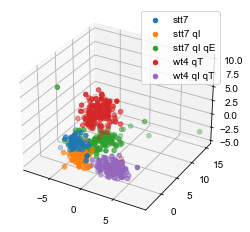

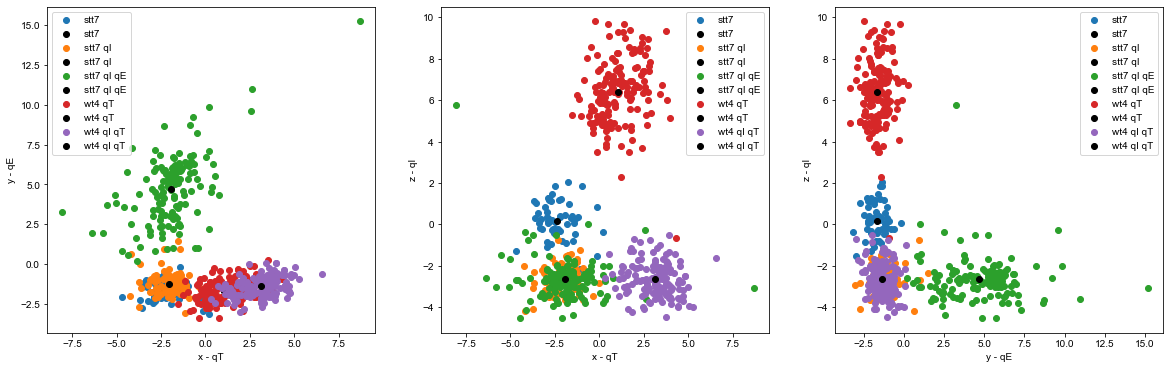

In [76]:
ax0 = mean_pos[4] - mean_pos[1]
ax1 = mean_pos[2] - mean_pos[1]
ax0 = ax0/np.linalg.norm(ax0)
ax1 = ax1/np.linalg.norm(ax1)
ax2 = np.cross(ax0, ax1)

B = np.array([ax0, ax1, ax2]).T

R = np.linalg.inv(B)

Tr = lda.scalings_[:,:3]
RTr= np.dot(R, Tr.T)


selected_classes = [0, 1, 2, 3, 4]
ref = np.ones(all_data.shape[0])* -1
c =  np.concatenate(class_set)
for ind in selected_classes:
    ref += c == ind
    
    
VV = 10

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig2, ax2 = plt.subplots(1, 3, figsize = (20, 6))
labels = database2[-1]
data = (database2[:-2].T - M)/S
for label in selected_classes:
    ind = labels == label
    #X = lda.transform(data.T[ind])
    XT = np.dot(data, RTr.T)
    X = XT[ind]
    description = all_descriptions[0][ind][0]

    ax.scatter(X[:, 0], X[:, 1], X[:,2], label = description)##
    ax2[0].scatter(X[:,0], X[:,1], label = description)
    ax2[0].scatter(np.mean(X[:,0]), np.mean(X[:,1]), color = "k", label = description)
    
    ax2[0].set_xlabel('x - qT')
    ax2[0].set_ylabel('y - qE')
    #ax2[0].set_xlim(-VV, VV)
    #ax2[0].set_ylim(-VV, VV)
    
    ax2[1].scatter(X[:,0], X[:,2], label = description)
    ax2[1].scatter(np.mean(X[:,0]), np.mean(X[:,2]), color = "k", label = description)

    ax2[1].set_xlabel('x - qT')
    ax2[1].set_ylabel('z - qI')
    #ax2[1].set_xlim(-VV, VV)
    #ax2[1].set_ylim(-VV, VV)
    
    ax2[2].scatter(X[:,1], X[:,2], label = description)
    ax2[2].scatter(np.mean(X[:,1]), np.mean(X[:,2]), color = "k", label = description)

    ax2[2].set_xlabel('y - qE')
    ax2[2].set_ylabel('z - qI')
    #ax2[2].set_xlim(-VV, VV)
    #ax2[2].set_ylim(-VV, VV)
    
ax.legend()
ax2[0].legend()
ax2[1].legend()
ax2[2].legend()


## Components interpretation

In [77]:
index = np.linspace(250, 2050, 91).astype(int)
for i in range(3):
    print(["qE", "qT", "qI"][i], index[np.abs(RTr[i])>0.1])


qE [ 270  290  310  330  350  370  390  410  430  450  470  490  510  530
  550  570  590  610  630  650  670  690  710  730  750  770  790  810
  830  850  890  910  930  950  970  990 1010 1030 1050 1070 1090 1110
 1130 1150 1170 1190 1210 1230 1250 1270 1290 1310 1330 1350 1370 1390
 1410 1430 1450 1470 1490 1510 1530 1550 1570 1590 1610 1630 1650 1670
 1690 1710 1730 1750 1770 1790 1810 1830 1850 1870 1890 1910 1930 1950
 1970 1990 2010 2030 2050]
qT [ 270  290  310  330  350  370  390  410  430  450  470  490  510  530
  550  570  590  610  630  650  670  690  710  730  750  770  790  810
  830  850  870  890  910  930  950  970  990 1010 1030 1050 1070 1090
 1110 1130 1150 1170 1190 1210 1230 1250 1270 1290 1310 1330 1350 1370
 1390 1410 1430 1450 1470 1490 1510 1530 1550 1570 1590 1610 1630 1650
 1670 1690 1710 1730 1750 1770 1790 1810 1830 1850 1870 1890 1910 1930
 1950 1970 1990 2010 2030 2050]
qI [ 270  290  310  330  350  370  390  410  430  450  470  490  510  530
  550  57

In [78]:
STOP = 30

loc = {}
ampl = {}

for i in range(3):
    position = np.argsort(np.abs(RTr[i]))
    ampl_couple = RTr[i][position][::-1][:STOP]
    ampl[i] = ampl_couple
    locus = index[position][::-1][:STOP]

    loc[i] = locus


530
490
1590
1030
1750
1690
1710
970
1890
1010
590
870
1050
390
1670
1070
750
1390
410
770
1770
1570
890
1190
650
1430
1870
790
1150
1730


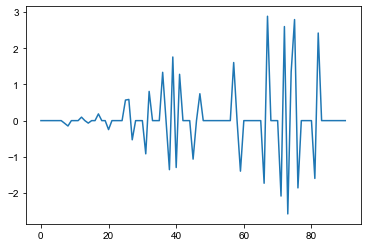

In [79]:
bases = []
base = np.zeros(2051)
for i in [1]:
    for j, couple in enumerate(loc[i]):
        print(couple)
        #print(ampl[i][j])
        base[couple] +=  ampl[i][j]
    #b = np.cumsum(base[250::20])
    b = base[250::20]*np.mean(all_data, axis = 0)

    plt.plot(b)
    


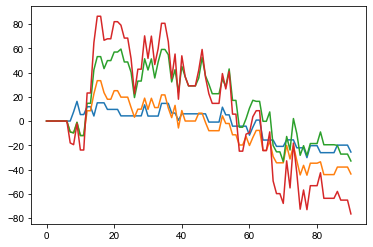

In [80]:
bases = []
base = np.zeros(2051)
for i in [2, 1, 0]:
    for j, couple in enumerate(loc[i]):
        #print(couple)
        #print(ampl[i][j])
        base[couple] -= ampl[i][j]
    b = np.cumsum(base[250::20])
    #b = base[250::20]

    plt.plot(b)
    if i !=2: 
        bases.append(b)
    else:
        bases.append(-b)
plt.plot(bases[1] + bases[2])

## Trajectories

In [81]:
from random import randrange

def transform_data(data, transform):
    print(data.shape, transform.shape)
    XT = np.dot(data.T, RTr.T)
    return XT


def follow_the_trace(X, elem, qI = False):

    ims = []
    for m in [0, 1, 2, 3]:
        if qI == False:
            video = elem.measure[m][-1] + "/video.tiff"
        else:
            video = elem.measure[0][m] + "/video.tiff"

        video = imageio.get_reader(video)
        ims.append(video.get_data(250))
    

    ims_sum = np.sum(np.array(ims), axis = 0)
    plt.figure()
    plt.imshow(ims_sum)
    plt.title("shifted")

    # unique mask
    exp_data = elem.measure[0][-1] + "/items_dict.npy"
    exp_data = np.load(exp_data, allow_pickle=True).item()
    mask = exp_data["labels"]
    mask_flat = mask.flatten()

    transforms = []


    diffs = []
    for j in [0,1,2,3]:
        shift, error, diffphase = skimage.registration.phase_cross_correlation(ims[j], ims[0], upsample_factor=100)
        shift = np.roll(shift,1)
        tform = skimage.transform.AffineTransform(translation = shift)
        transforms.append(tform)
        ims[j] = skimage.transform.warp(ims[j], tform)*255
        #masks.append(skimage.transform.warp(mask, tform))
        #mask_j = skimage.transform.warp(mask, tform)
        if qI == False:
            video = elem.measure[j][-1] + "/video.tiff"
        else:
            video = elem.measure[0][j] + "/video.tiff"

        video = imageio.get_reader(video)
        #diff = elem.get_ratio_from_video(video, 250, 270, tform)

        #plt.figure()
        #plt.imshow((diff*mask))
        couples = np.array(list_of_couples)[:,positions_to_keep].T

        diff = elem.get_ratio_video_array_mask(video, couples, tform)
        diff = diff.reshape(diff.shape[0], -1)
        diffs.append(diff)
        print(diff.shape)


    ims_sum = np.sum(np.array(ims), axis = 0)
    plt.figure()
    plt.imshow(ims_sum)
    plt.title("corrected shift")


    diffs = diffs.reshape(diffs.shape[0], diffs.shape[1], -1)
    for label in np.unique(mask):
        if label !=0:
            diff_labels.append(np.mean(diffs[:,:,mask_flat==label], axis = -1))

    diff_labels = np.array(diff_labels)
    diff_labels.shape

    fig = plt.figure(figsize=(15, 10))
    fig, ax, ax_histx, ax_histy = add_axs_hist(fig)

    plot_background(XT[:,0],XT[:,1], fig, ax, exp_description, liste = [0,1,2], alpha=0.3)


    N = 9
    X, Y = [], []
    for i in range(4):
        x, y = transform_data(diff_labels[:,i,:].T, RTr)
        X.append(x)
        Y.append(y)

    X = np.array(X)
    Y = np.array(Y)
    if True:
        for i in range(X.shape[1]):
            #plt.scatter(x, y, s= 3)
            #plt.arrow(x = np.float(X[i]), y = np.float(Y[i]), dx = np.float(X[i+1] - X[i]), dy = np.float(Y[i+1] - Y[i]), width = 0.0005)
            ax.plot(X[:,i], Y[:,i], alpha = 0.0)

    if False:
        
        for k in range(X.shape[1]):
            if randrange(10) == 5:

                for i in range(3):
                
                    ax.quiver(X[i,k], Y[i,k], X[i+1,k] - X[i,k], Y[i+1,k] - Y[i,k], color =  colors[i], width = 0.0005) 

    if True:
        for i in range(4):
            ax.scatter(X[i], Y[i], alpha = 0.3)
            
    if True:
        v =np.random.randint(1, X.shape[1], 75)
        ax.plot(X[:,v,0], Y[:,v,0], 'o--')

    for i in range(3):
        ax.arrow(np.mean(X[i]), np.mean(Y[i]), np.mean(X[i+1] - X[i]), np.mean(Y[i+1] - Y[i]), color = "k", width = 0.01) 
        
        
    return X, Y, mask

 
def add_axs_hist(fig):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    return fig, ax, ax_histx, ax_histy

def coherence(X, Y):


    DX = []
    DY = []
    MX = []
    MY = []
    for i in range(3):
        difx = X[i+1,:] - X[i,:]
        dify = Y[i+1,:] - Y[i,:]
        DX.append(difx)
        DY.append(dify)
        MX.append(np.expand_dims(np.array([difx.mean()]*difx.shape[0]), 1))
        MY.append(np.expand_dims(np.array([dify.mean()]*dify.shape[0]), 1))


    fig, ax = plt.subplots(3, 3, figsize = (20, 16))
    #fig, axs = plt.subplots(1, 1, figsize = (15, 4))
    for i in range(3):
        D = np.concatenate([DX[i], DY[i]], 1)
        M = np.concatenate([MX[i], MY[i]], 1)
        D = D / np.tile(np.linalg.norm(D, axis=1), (2,1)).T
        M = M / np.tile(np.linalg.norm(M, axis=1), (2,1)).T


        S1 = D[:,0]*M[:,0] + D[:,1]*M[:,1]
        S = np.arctan2(D[:,0], D[:,1]) -  np.arctan2(M[:,0], M[:,1])
        S2 = (S + np.pi)%(2*np.pi) - np.pi
        ax[0, i].hist(S2, bins = 50, alpha = 0.5)
        ax[0, i].set_ylim(0, 50)
        ax[0, i].set_xlim(-np.pi, np.pi)

        ax[0,i].set_xlabel("angle with the mean vector", fontsize=14)
        ax[0,i].set_title("step %d to %d"%(i, i+1), fontsize = 17)

        ax[1, i].hist(S1, bins = 50, alpha = 0.5)
        ax[1,i].set_xlabel("sine similarity",  fontsize=14)
        ax[1, i].set_xlim(-1.1, 1.1)
        ax[1, i].set_ylim(0, 200)
        

        ax[2][0].quiver(X[0], Y[0], X[1] - X[0], Y[1] - Y[0], color =  colors[i], width = 0.005, scale = 8) 
        ax[2][2].quiver(X[1], Y[1], X[2] - X[1], Y[2] - Y[1], color =  colors[i], width = 0.005, scale = 8)
        ax[2][1].quiver(X[2], Y[2], X[3] - X[2], Y[3] - Y[2], color =  colors[i], width = 0.005, scale = 8)

    return S1, S2



def plot_background(x,y,fig, ax,  exp_description, liste = [0,1,2], alpha=1):
    colors = ["black", "blue", "green", "red"]
    for j, i in enumerate(liste):
        # definitions for the axes


        # use the previously defined function
        ax.scatter(x[all_classes[0]==i], y[all_classes[0]==i], s=10, label = exp_description[i].expandtabs() , alpha=alpha, c=colors[j])
        ax.set_xlabel("PC1", fontsize=g.fontsize)
        ax.set_ylabel("PC2", fontsize=g.fontsize)
    ax.legend(prop={"size": g.fontsize})

In [82]:
np.sum(positions_to_keep)

91

IndexError: boolean index did not match indexed array along dimension 1; dimension is 4095 but corresponding boolean dimension is 91

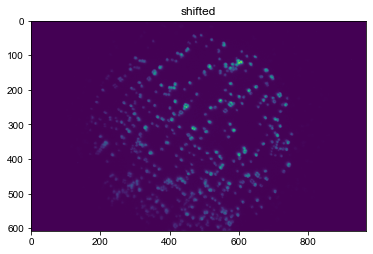

In [83]:
X0,Y0, mask = follow_the_trace(X, exp_set[6], qI = False)
S = coherence(X0,Y0)

In [59]:
positions_to_keep.shape

(4095,)

In [60]:
np.array(list_of_couples)[:,positions_to_keep].shape

(2, 4095)

In [61]:
v.shape

NameError: name 'v' is not defined

In [62]:
X[].shape

SyntaxError: invalid syntax (2429191990.py, line 1)

In [63]:
all_classes.shape

(1, 1431)

In [23]:
couples = np.array(list_of_couples)[:,positions_to_keep].T
couples

array([[ 250,  270],
       [ 250,  290],
       [ 250,  310],
       ...,
       [2010, 2030],
       [2010, 2050],
       [2030, 2050]])